In [1]:
import numpy as np
import sys
from theano_lstm import lstm_rnn
from network_optimizers import adam_loves_theano, adadelta_fears_committment
from data_managers import character_data_manager

In [2]:
# Ask Jeeves.
data_butler = character_data_manager('/Users/alex/Desktop/data manager/')

In [3]:
%%time
# Get a network
inp_dim = data_butler.ent_vecs.shape[1]
out_dim = data_butler.ent_vecs.shape[0]-1

net_specs = [ (128,100), (128,100) ]

network = lstm_rnn(inp_dim,net_specs,out_dim)

//anaconda/lib/python2.7/site-packages/theano/scan_module/scan_perform_ext.py:133: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility
  from scan_perform.scan_perform import *


TypeError: ('An update must have the same type as the original shared variable (shared_var=<TensorType(float64, col)>, shared_var.type=TensorType(float64, col), update_val=Elemwise{sub,no_inplace}.0, update_val.type=TensorType(float64, matrix)).', 'If the difference is related to the broadcast pattern, you can call the tensor.unbroadcast(var, axis_to_unbroadcast[, ...]) function to remove broadcastable dimensions.')

In [9]:
C = np.zeros(0)

In [20]:
import matplotlib
import matplotlib.pyplot as plt
% matplotlib inline

In [62]:
def moving_average(a, n=50) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

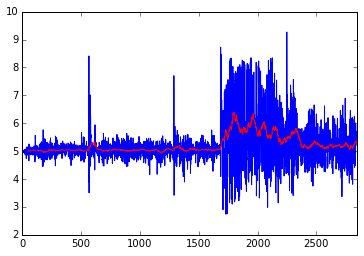

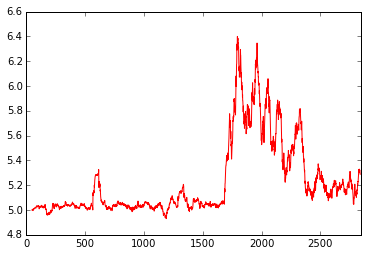

In [123]:
plt.figure();
ax = plt.axes();
n = 50.0
ax.plot( C, 'b-', np.arange(len(C)-n+1)+n, moving_average(C,n), 'r'  );
ax.set_xlim([0,len(C)+5]);

plt.figure();
ax = plt.axes();
ax.plot( np.arange(len(C)-n+1)+n, moving_average(C,n), 'r'  );
ax.set_xlim([0,len(C)+5]);

000  4.968	0684	m: Possession_ii


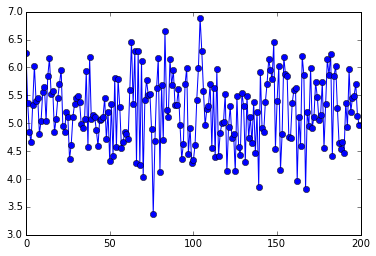

In [159]:
for stps in range(1):
    S,T = data_butler.offer_data()
    while T == 150:
        S,T = data_butler.offer_data()
    q = data_butler.get_current_query()
    d = data_butler.get_current_doc()
    this_cost = network.adam_step(S,T)
    data_butler.advance_schedule()
    C = np.hstack( (C,this_cost) )
    print '%03d  %1.3f\t%04d\t%s: %s'%(stps,this_cost,d['vecs'].shape[0],q['sm'],q['doc'])
    sys.stdout.flush()
plt.figure();
ax = plt.axes();
ax.plot( C[-200:], 'o-' );

In [160]:
S.shape

(705, 300)

In [124]:
S,T = data_butler.offer_data()
while T == 150:
    S,T = data_butler.offer_data()
q = data_butler.get_current_query()
d = data_butler.get_current_doc()
this_cost = network.adam_step(S,T)
data_butler.advance_schedule()
C = np.hstack( (C,this_cost) )

5.12693878207
4.58992980123
5.57850599716
5.54464293773


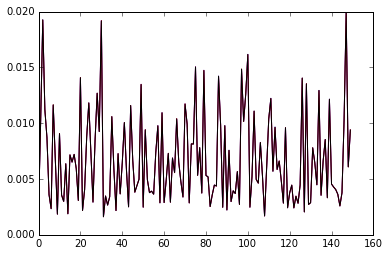

In [130]:
S1,T1 = data_butler.permute_example()
while T1 == 150:
    S1,T1 = data_butler.permute_example()
S2,T2 = data_butler.permute_example()
while T2 == 150:
    S2,T2 = data_butler.permute_example()
S3,T3 = data_butler.permute_example()
while T3 == 150:
    S3,T3 = data_butler.permute_example()

print this_cost
print network.cost(S1,T1)
print network.cost(S2,T2)
print network.cost(S3,T3)

plt.figure();
ax = plt.axes();
ax.plot( network.process(S1), 'b-', network.process(S2), 'r-', network.process(S3), 'k-' );

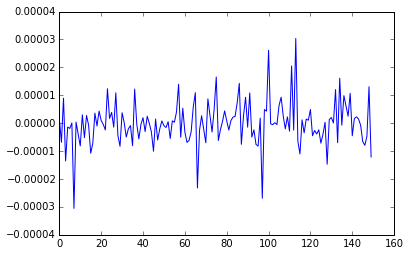

In [132]:
plt.figure();
ax = plt.axes();
ax.plot( network.process(S1) - network.process(S2) );

In [121]:
len(C)

2731

In [134]:
import theano
input_sequence = theano.tensor.dmatrix('inp')
# Through the LSTM stack, then soft max
y = network.LSTM_stack.process(input_sequence)
LSTM_out = theano.function([input_sequence],y)

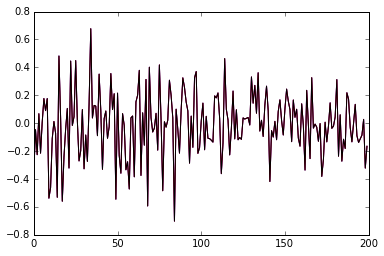

In [168]:
data_butler.advance_schedule()
S1,T1 = data_butler.offer_data()
while T1 == 150:
    S1,T1 = data_butler.permute_example()
S2,T2 = data_butler.permute_example()
while T2 == 150:
    S2,T2 = data_butler.permute_example()
S3,T3 = data_butler.permute_example()
while T3 == 150:
    S3,T3 = data_butler.permute_example()

S1A = S1.copy()

plt.figure();
ax = plt.axes();
ax.plot( LSTM_out(S1), 'b', LSTM_out(S2),'r', LSTM_out(S3),'k' );

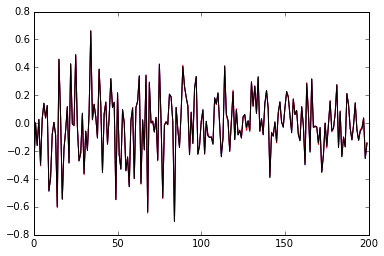

In [169]:
data_butler.advance_schedule()
S1,T1 = data_butler.offer_data()
while T1 == 150:
    S1,T1 = data_butler.permute_example()
S2,T2 = data_butler.permute_example()
while T2 == 150:
    S2,T2 = data_butler.permute_example()
S3,T3 = data_butler.permute_example()
while T3 == 150:
    S3,T3 = data_butler.permute_example()

S1B = S1.copy()
    
plt.figure();
ax = plt.axes();
ax.plot( LSTM_out(S1), 'b', LSTM_out(S2),'r', LSTM_out(S3),'k' );

In [170]:
data_butler.get_current_query()

{'a': 1,
 'doc': u'The_Prince_and_the_Pauper_iiii',
 'loc': 'query_0048491.pkl',
 'sm': 'm',
 'tags': [(3, None),
  (1, 6),
  None,
  None,
  None,
  None,
  None,
  None,
  (1, 5),
  None,
  (4, None),
  None,
  None],
 'text': u'QUERYSTART ent006 is his father, who treats ent005 and XXXXXX cruelly.',
 'vecs': None}

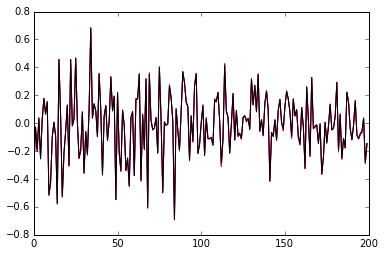

In [171]:
data_butler.advance_schedule()
S1,T1 = data_butler.offer_data()
while T1 == 150:
    S1,T1 = data_butler.permute_example()
S2,T2 = data_butler.permute_example()
while T2 == 150:
    S2,T2 = data_butler.permute_example()
S3,T3 = data_butler.permute_example()
while T3 == 150:
    S3,T3 = data_butler.permute_example()
    
S1C = S1.copy()

plt.figure();
ax = plt.axes();
ax.plot( LSTM_out(S1), 'b', LSTM_out(S2),'r', LSTM_out(S3),'k' );

In [172]:
data_butler.get_current_query()

{'a': 4,
 'doc': u'The_Power_of_Darkness_iiii',
 'loc': 'query_0048720.pkl',
 'sm': 'm',
 'tags': [(3, None),
  (1, 1),
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  (1, 1),
  None,
  None,
  None,
  (4, None),
  None,
  None,
  (1, 2),
  None,
  None,
  None],
 'text': u"QUERYSTART ent001 and his mistress, with the help of ent001's mother, XXXXXX, plan ent002's murder.",
 'vecs': None}

In [177]:
print S1B[1][0:10]
print S1C[1][0:10]

[-0.11291608  0.04302452 -0.01772044  0.02048775  0.04985069  0.01494666
  0.00381087 -0.06244221 -0.05876837 -0.02058687]
[-0.10257129 -0.00074263  0.05023879 -0.01742433  0.02124967  0.13248548
 -0.01618461 -0.05133118 -0.03747026  0.01373675]


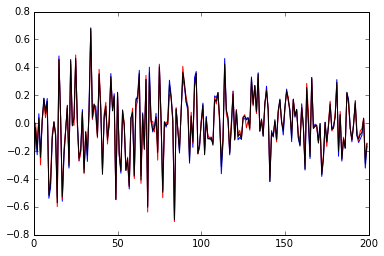

In [191]:
plt.figure();
ax = plt.axes();
ax.plot( LSTM_out(S1A), 'b', LSTM_out(S1B),'r', LSTM_out(S1C),'k' );

In [178]:
LSTM_params = network.LSTM_stack.list_params()

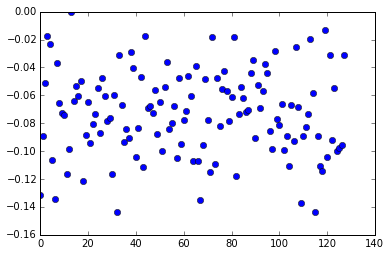

In [190]:
plt.figure();
ax = plt.axes();
ax.plot( LSTM_params[1].get_value(), 'o' );

In [193]:
tmp = np.random.normal(size=(5,10,3))

In [196]:
tmp[1,].shape

(10, 3)

In [197]:
from lstm_network_components import LSTM_layer

In [203]:
tst = LSTM_layer(20,5,10)
tst.initialize_weights()

In [244]:
tst_inp_s = theano.tensor.dvector()
prev_c_s  = theano.tensor.dvector()
prev_h_s  = theano.tensor.dvector()
prev_y_s  = theano.tensor.dvector()

[c,h,y] = tst.step(tst_inp_s,prev_c_s,prev_h_s,prev_y_s)

tst_fun_s = theano.function([tst_inp_s,prev_c_s,prev_h_s,prev_y_s],[c,h,y])

In [245]:
tst_inp = theano.tensor.dmatrix()

out_init = [
    theano.tensor.alloc( np.zeros(1).astype(theano.config.floatX), tst.num_hidden),
    theano.tensor.alloc( np.zeros(1).astype(theano.config.floatX), tst.num_hidden),
    theano.tensor.alloc( np.zeros(1).astype(theano.config.floatX), tst.num_outputs)
    ]

([C,H,Y],updates) = theano.scan(fn=tst.step,
                                sequences=tst_inp,
                                outputs_info=out_init)

tst_fun = theano.function([tst_inp],[C,H,Y])

In [246]:
II = np.random.normal( size=(20,) )
CC = np.random.normal( size=(5,))
HH = np.random.normal( size=(5,))
YY = np.random.normal( size=(10,))

In [247]:
[c,h,y] = tst_fun_s(II,CC,HH,YY)

In [248]:
[c,h,y] = tst_fun( np.random.normal( size=(5,20) ) )

In [283]:
import theano
import theano.tensor as T
import numpy as np


class test_LSTM_layer:
    """A layer of an LSTM network"""

    def __init__(self, num_inputs=None, num_hidden=None, num_outputs=None):
        self.num_inputs = num_inputs
        self.num_hidden = num_hidden
        self.num_outputs = num_outputs

    def set_weights(self, W_i, b_i, W_f, b_f, W_o, b_o, W_y, b_y):
        """
        :param W_i: LSTM input gate weights
        :param b_i: LSTM input gate bias
        :param W_f: LSTM forget gate weights
        :param b_f: LSTM forget gate bias
        :param W_o: LSTM output gate weights
        :param b_o: LSTM output gate bias
        :param W_y: Hidden layer output weights
        :param b_y: Hidden layer output bias
        :return: None
        """

        self.W_i = W_i
        self.b_i = b_i

        self.W_f = W_f
        self.b_f = b_f

        self.W_o = W_o
        self.b_o = b_o

        self.W_y = W_y
        self.b_y = b_y

    def initialize_weights(self, num_inputs=None, num_hidden=None, num_outputs=None):
        """
        :param num_inputs: number of input units
        :param num_hidden: number of hidden units
        :param num_outputs: number of output units
        :return: None
        """
        # Handle arguments. I dislike how Matlabian this is. But apparently default arguments are evaluated when a
        # function is declared, so you can't set the default argument to be a class attribute. Bummer.
        if num_inputs is None:
            num_inputs = self.num_inputs
        else:
            self.num_inputs = num_inputs

        if num_hidden is None:
            num_hidden = self.num_hidden
        else:
            self.num_hidden = num_hidden

        if num_outputs is None:
            num_outputs = self.num_outputs
        else:
            self.num_outputs = num_outputs

        # LSTM layers have, for every hidden "unit" a unit and a corresponding memory cell
        # Memory cells include input, forget, and output gates as well as a value
        # There is also a set of outputs.
        # Fuck that's a lot of stuff.
        # (this should help):

        # Initialize attributes for every weight of i
        W_i_size = (num_inputs + num_outputs + num_hidden + num_hidden,  # (inp + prev_out + prev_hidden + prev_c)
                    num_hidden)
        self.W_i = self.__init_W__(*W_i_size)
        self.b_i = self.__init_b__(num_hidden)

        # Initialize attributes for every weight of f
        W_f_size = (num_inputs + num_hidden + num_hidden,  # (inp + prev_hidden + prev_c)
                    num_hidden)
        self.W_f = self.__init_W__(*W_f_size)
        self.b_f = self.__init_b__(num_hidden)

        # Initialize attributes for every weight of c
        W_c_size = (num_inputs + num_outputs + num_hidden,  # (inp + prev_out + prev_hidden)
                    num_hidden)
        self.W_c = self.__init_W__(*W_c_size)
        self.b_c = self.__init_b__(num_hidden)

        # Initialize attributes for every weight of o
        W_o_size = (num_inputs + num_outputs + num_hidden + num_hidden,  # (inp+prev_out + prev_hidden + CURRENT_c)
                    num_hidden)
        self.W_o = self.__init_W__(*W_o_size)
        self.b_o = self.__init_b__(num_hidden)

        # Intialize attributes for weights of y (the real output)
        self.W_y = self.__init_W__(num_hidden, num_outputs)
        self.b_y = self.__init_b__(num_outputs)

        # Congrats. Now this is initialized.

    @staticmethod
    def __init_W__(n_in, n_out):
        return theano.shared(np.random.uniform(
            low=-1. / np.sqrt(n_in),
            high=1. / np.sqrt(n_in),
            size=(n_out, n_in)).astype(theano.config.floatX))

    @staticmethod
    def __init_b__(n):
        return theano.shared( np.zeros((n,1)).astype(theano.config.floatX), broadcastable=(False,True) )

    def list_params(self):
        # Provide a list of all parameters to train
        return [self.W_i, self.b_i, self.W_f, self.b_f, self.W_c, self.b_c, self.W_o, self.b_o, self.W_y, self.b_y]

    # Write methods for calculating the value of each of these playas at a given step
    def calc_i(self, combined_inputs):
        return T.nnet.sigmoid(T.dot(self.W_i, combined_inputs) + self.b_i)

    def calc_f(self, combined_inputs):
        return T.nnet.sigmoid(T.dot(self.W_f, combined_inputs) + self.b_f)

    def calc_c(self, prev_c, curr_f, curr_i, combined_inputs):
        return curr_f*prev_c + curr_i*T.tanh(T.dot(self.W_c, combined_inputs) + self.b_c)

    def calc_o(self, combined_inputs):
        return T.nnet.sigmoid(T.dot(self.W_o, combined_inputs) + self.b_o)

    def calc_h(self, curr_o, curr_c):
        return curr_o * T.tanh( curr_c )

    def calc_y(self, curr_h):
        return T.dot(self.W_y, curr_h) + self.b_y

    def step(self, inp, prev_c, prev_h, prev_y):
        # Put this together in a method for updating c, h, and y
        i = self.calc_i( T.concatenate( (inp,prev_y, prev_h, prev_c)) )
        f = self.calc_f( T.concatenate( (inp,prev_h, prev_c) ) )
        c = self.calc_c( prev_c, f, i, T.concatenate((inp, prev_y, prev_h)) )
        o = self.calc_o( T.concatenate( (inp, prev_y, prev_h, c)) )
        h = self.calc_h( o, c )
        y = self.calc_y( h )

        return c, h, y



In [280]:
M = theano.tensor.dmatrix()
bval = np.array([[10, 20, 30]]).T
V = theano.shared(bval, broadcastable=(False,True))

OUT = M + V

tst_bcast = theano.function([M],OUT)

In [285]:
tst = test_LSTM_layer(20,5,10)
tst.initialize_weights()

tst_inp_s = theano.tensor.dmatrix()
prev_c_s  = theano.tensor.dmatrix()
prev_h_s  = theano.tensor.dmatrix()
prev_y_s  = theano.tensor.dmatrix()

[c,h,y] = tst.step(tst_inp_s,prev_c_s,prev_h_s,prev_y_s)

tst_fun_s = theano.function([tst_inp_s,prev_c_s,prev_h_s,prev_y_s],[c,h,y])

In [286]:
n_ex = 15
II = np.random.normal( size=(20,n_ex) )
CC = np.random.normal( size=(5,n_ex))
HH = np.random.normal( size=(5,n_ex))
YY = np.random.normal( size=(10,n_ex))
[c,h,y] = tst_fun_s(II,CC,HH,YY)

In [290]:
YY.shape

(10, 15)

In [302]:
tst_inp = theano.tensor.tensor3()

out_init = [
    theano.tensor.alloc( np.zeros(1).astype(theano.config.floatX), tst.num_hidden,  tst_inp.shape[2]),
    theano.tensor.alloc( np.zeros(1).astype(theano.config.floatX), tst.num_hidden,  tst_inp.shape[2]),
    theano.tensor.alloc( np.zeros(1).astype(theano.config.floatX), tst.num_outputs, tst_inp.shape[2])
    ]

([C,H,Y],updates) = theano.scan(fn=tst.step,
                                sequences=tst_inp,
                                outputs_info=out_init)


tst_fun = theano.function([tst_inp],[C,H,Y])
seq_len = 30
n_ex = 15
III = np.random.normal( size=(seq_len,20,n_ex) )
[c,h,y] = tst_fun(III)

In [305]:
c.shape

(30, 5, 15)

In [315]:
np.mod(6,5)

1